In [1]:
# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf

In [3]:
# Step 1: Download Stock Data

In [4]:
start = '2005-01-01'
end = '2024-11-01'
stock = 'TATASTEEL.NS'
data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,,
2005-01-03,8.930237,32.613228,33.265915,32.310047,33.265915,50045402
2005-01-04,8.923319,32.587963,32.962730,32.364788,32.592175,46787469
2005-01-05,8.509380,31.076260,32.491112,30.423573,32.423740,95217448
2005-01-06,8.200368,29.947744,31.000463,29.783520,30.739389,92509792
2005-01-07,8.332967,30.431995,30.684649,29.935112,30.107758,63318130
...,...,...,...,...,...,...
2024-10-25,145.860001,145.860001,149.500000,144.429993,149.000000,39730802
2024-10-28,149.380005,149.380005,149.729996,144.729996,146.000000,28386897


In [6]:
# Step 2: Create DataFrame and Reset Index

In [7]:
df = pd.DataFrame(data)
df.reset_index(inplace=True)
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
0,2005-01-03,8.930237,32.613228,33.265915,32.310047,33.265915,50045402
1,2005-01-04,8.923319,32.587963,32.962730,32.364788,32.592175,46787469
2,2005-01-05,8.509380,31.076260,32.491112,30.423573,32.423740,95217448
3,2005-01-06,8.200368,29.947744,31.000463,29.783520,30.739389,92509792
4,2005-01-07,8.332967,30.431995,30.684649,29.935112,30.107758,63318130
...,...,...,...,...,...,...,...
4889,2024-10-25,145.860001,145.860001,149.500000,144.429993,149.000000,39730802
4890,2024-10-28,149.380005,149.380005,149.729996,144.729996,146.000000,28386897
4891,2024-10-29,150.059998,150.059998,150.449997,146.550003,149.850006,32258407


In [8]:
# Step 3: Add Moving Averages

In [9]:
df['MA_100'] = df['Close'].rolling(100).mean()
df['MA_200'] = df['Close'].rolling(200).mean()

In [10]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,,
0,2005-01-03,8.930237,32.613228,33.265915,32.310047,33.265915,50045402,NaN,NaN
1,2005-01-04,8.923319,32.587963,32.962730,32.364788,32.592175,46787469,NaN,NaN
2,2005-01-05,8.509380,31.076260,32.491112,30.423573,32.423740,95217448,NaN,NaN
3,2005-01-06,8.200368,29.947744,31.000463,29.783520,30.739389,92509792,NaN,NaN
4,2005-01-07,8.332967,30.431995,30.684649,29.935112,30.107758,63318130,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4889,2024-10-25,145.860001,145.860001,149.500000,144.429993,149.000000,39730802,161.5246,156.83380
4890,2024-10-28,149.380005,149.380005,149.729996,144.729996,146.000000,28386897,161.4289,156.90395
4891,2024-10-29,150.059998,150.059998,150.449997,146.550003,149.850006,32258407,161.2375,156.98300


In [11]:
# Step 4: Split Data into Train and Test
# Reserve the last 100 records as test data

In [12]:
train = pd.DataFrame(df['Close'][0:len(df) - 100])
test = pd.DataFrame(df['Close'][len(df) - 100:])

In [13]:
# Step 5: Scale Data for LSTM

In [14]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [15]:
# Step 6: Prepare Training Data

In [16]:
x_train, y_train = [], []
for i in range(100, len(train_scaled)):
    x_train.append(train_scaled[i-100:i])
    y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(4694, 100, 1)

In [22]:
# Step 7: Build the LSTM Model

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\matru\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Step 8: Train the Model

In [25]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 33s 165ms/step - loss: 0.0246
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - loss: 0.0030
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - loss: 0.0022
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 162ms/step - loss: 0.0018
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - loss: 0.0019
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - loss: 0.0017
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - loss: 0.0016
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - loss: 0.0014
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - loss: 0.0015
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 25s 168ms/step - loss: 0.0015
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - loss: 0.0016
Epoch 12/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 162ms/step - loss: 0.0012
Epoch 13/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - loss: 0.0014
Epoch 14/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 24s 162ms/step - loss: 0.0012
Epoch 15/50
147

In [26]:
y_pred_train = model.predict(x_train)

147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


In [28]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train,y_pred_train)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(mse)

In [34]:
print(train_r2)
print(train_rmse)

0.9655565754314055
0.036346314123677836


In [35]:
# Step 9: Prepare Test Data

In [36]:
past_100_days = train.tail(100)
final_test_data = pd.concat([past_100_days, test], ignore_index=True)
final_test_scaled = scaler.transform(final_test_data)


In [37]:
x_test = []
y_test = []
for i in range(100, len(final_test_scaled)):
    x_test.append(final_test_scaled[i-100:i])
    y_test.append(final_test_scaled[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [38]:
# Step 10: Make Predictions

In [39]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [40]:
# Step 11: Evaluate the Model

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

test_r2 = r2_score(y_test,y_pred)

mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [44]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R2_Score:{test_r2}")


Mean Squared Error (MSE): 97.13041696086528
Root Mean Squared Error (RMSE): 9.855476495881124
Mean Absolute Error (MAE): 7.809552307128906
Mean Absolute Percentage Error (MAPE): 4.86%
R2_Score:0.12067940505369867


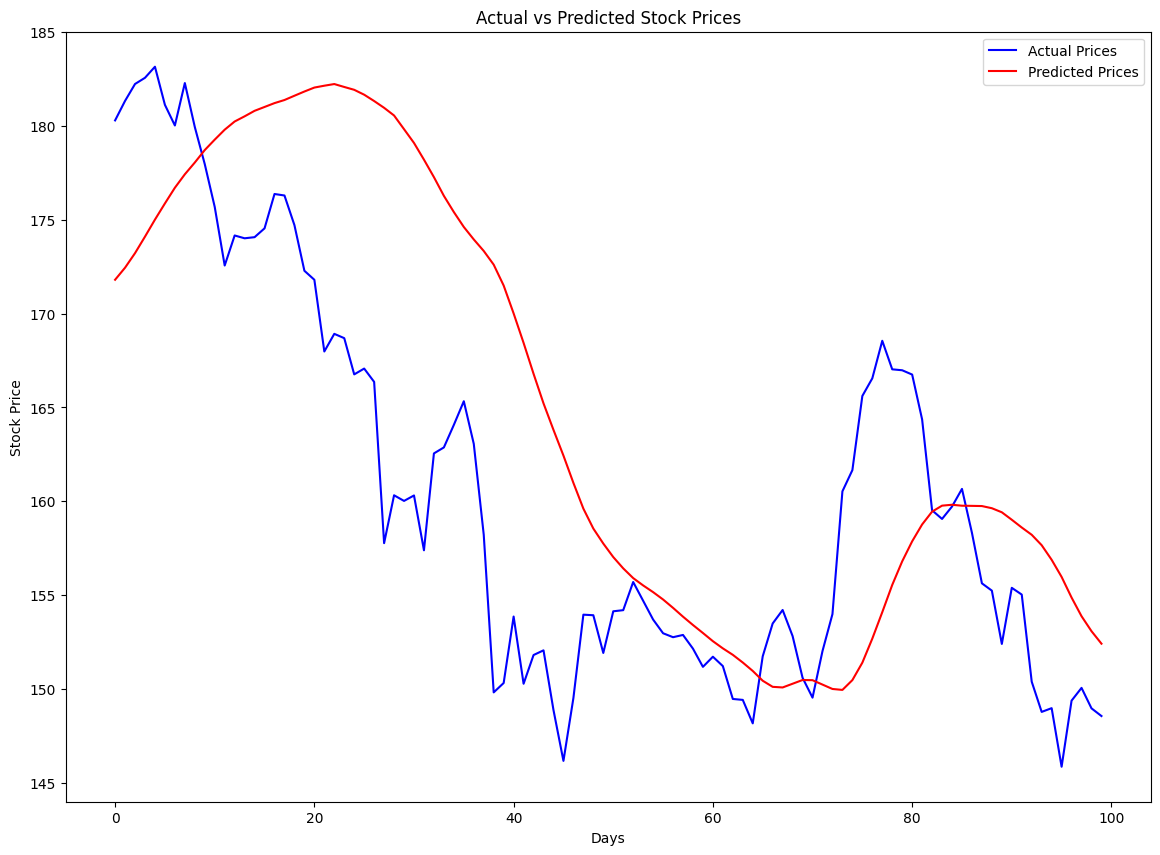

In [45]:
# Step 12: Plot Results
plt.figure(figsize=(14, 10))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

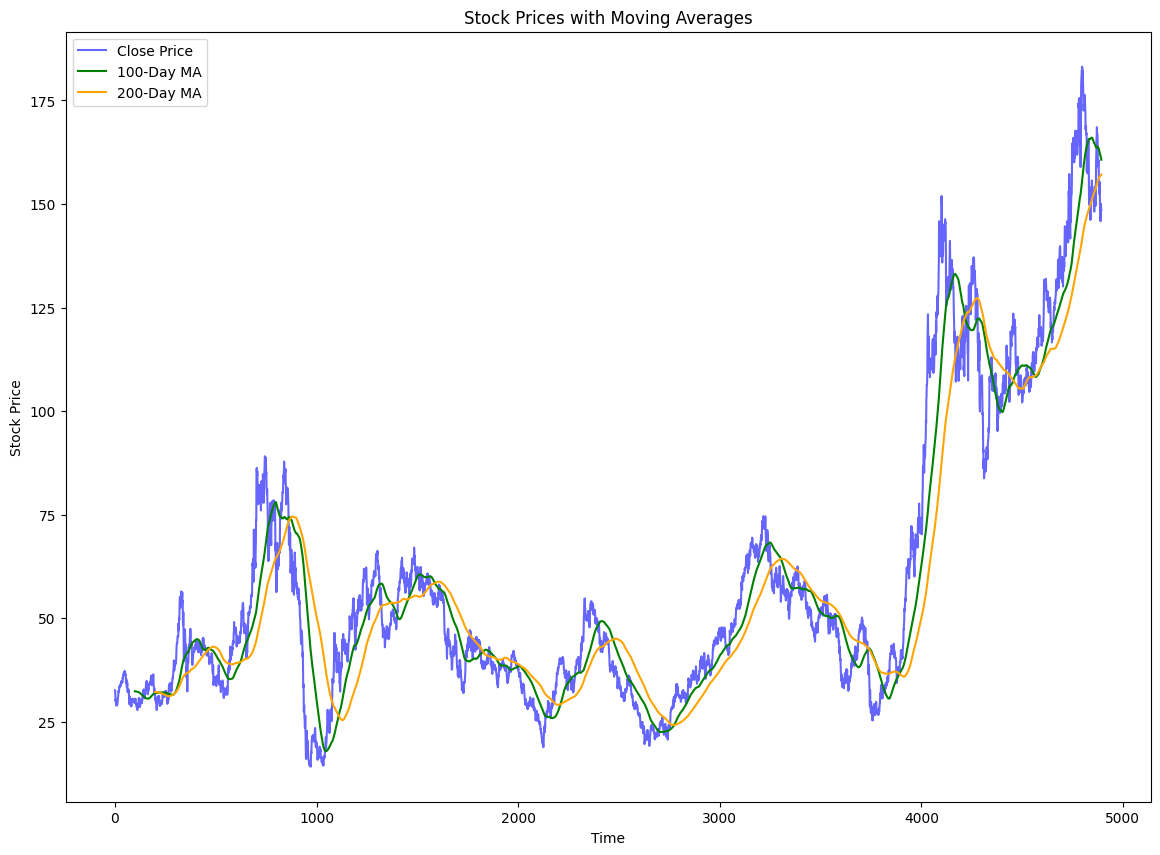

In [46]:
# Step 13: Plot with Moving Averages
plt.figure(figsize=(14, 10))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df['MA_100'], label='100-Day MA', color='green')
plt.plot(df['MA_200'], label='200-Day MA', color='orange')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [47]:
# Predict future stock prices (e.g., the next 30 days)

In [48]:

last_100_days = df['Close'][-100:].values
future_predictions = []

for _ in range(30):
    scaled_last_100_days = scaler.transform(last_100_days.reshape(-1, 1)).reshape(1, 100, 1)
    next_day_prediction = model.predict(scaled_last_100_days)
    next_day_prediction = scaler.inverse_transform(next_day_prediction)
    future_predictions.append(next_day_prediction[0, 0])
    last_100_days = np.append(last_100_days[1:], next_day_prediction[0, 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\matru\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [49]:
# Plot future predictions

In [50]:
# Generate future dates for prediction
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]  # Get the last date from the DataFrame index
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

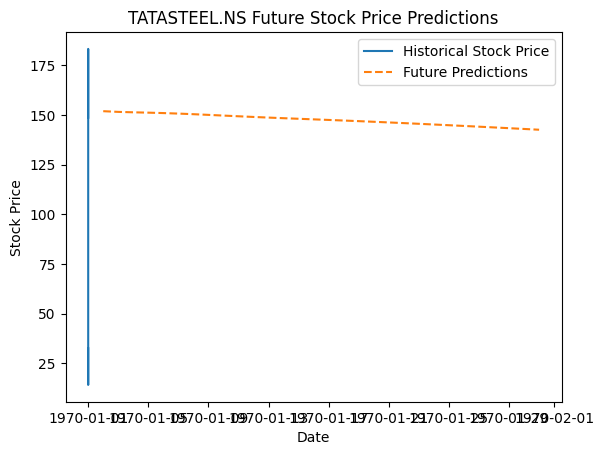

In [51]:
plt.plot(df['Close'], label='Historical Stock Price')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title(f'{stock} Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [52]:
import joblib

# Save the trained model to a file
model_filename = 'stock_prediction_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as stock_prediction_model.pkl


In [53]:
model.save('Stock_price_prediction.keras')

In [54]:
future_predictions

[151.83496,
 151.48807,
 151.27632,
 151.09647,
 150.88824,
 150.6294,
 150.32257,
 149.98285,
 149.62889,
 149.27713,
 148.9384,
 148.61714,
 148.31195,
 148.01778,
 147.72794,
 147.43607,
 147.13719,
 146.82869,
 146.50961,
 146.18045,
 145.84227,
 145.49367,
 145.13942,
 144.77948,
 144.41447,
 144.04425,
 143.66847,
 143.28731,
 142.90149,
 142.51123]